<a href="https://colab.research.google.com/github/HebaAhmedDahab/Projects-/blob/main/supermaket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
supermarket = pd.read_csv("/content/supermarket.csv")
supermarket.head(3)

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [3]:
#round the columns to nearest decimal
supermarket['Tax 5%'] = supermarket['Tax 5%'].round(1)
supermarket['Total'] = supermarket['Total'].round(1)
supermarket['gross margin percentage'] = supermarket['gross margin percentage'].round(1)
supermarket['gross income'] = supermarket['gross income'].round(0)

supermarket = supermarket.drop('Unnamed: 0',axis=1) #dropping the column coz is unneeded (its an index but we already have one)

In [4]:
#converting to datetime
supermarket['Date'] = pd.to_datetime(supermarket['Date'], errors='coerce')

In [5]:
supermarket['Branch'].unique() #checking the unique values  

array(['A', 'C', 'B'], dtype=object)

In [6]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [7]:
supermarket.shape

(1000, 17)

In [8]:
supermarket.duplicated().sum()

0

In [9]:
supermarket.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
#make the first characters of the words are capitalized and counting the unique values
supermarket['City'].str.title().value_counts(dropna=False)
supermarket['Customer type'].str.title().value_counts(dropna=False)
supermarket['Gender'].str.title().value_counts(dropna=False)
supermarket['Product line'].str.title().value_counts(dropna=False)
supermarket['Payment'].str.title().value_counts(dropna=False)

Ewallet        345
Cash           344
Credit Card    311
Name: Payment, dtype: int64

#we have 3 branches (A,B and C) 
# will split the branches and exploring each one 

#Branch A 


In [11]:
#filtering teh columns that have any data about branch A  

branch_A = supermarket[supermarket['Branch']=='A']
branch_A.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1,549.0,2019-01-05,13:08,Ewallet,522.83,4.8,26.0,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2,340.5,2019-03-03,13:23,Credit card,324.31,4.8,16.0,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.3,489.0,2019-01-27,20:33,Ewallet,465.76,4.8,23.0,8.4


In [12]:
#the gross income of every product line per month

#using groupby func. to filter the data for each product line and their gross income in every period 
branch_A['Date'] = pd.to_datetime(branch_A['Date'], errors='coerce')
a = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0)) 
a['total income '] = a.iloc[0:].sum(axis=1) #add a row for total income for every period 
a.loc['total',0:]= a.sum(axis=0) ##add a column for total income for every product line 
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Date,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,total income
Product line,,,,
Electronic accessories,298.0,255.0,320.0,873.0
Fashion accessories,307.0,269.0,204.0,780.0
Food and beverages,221.0,312.0,284.0,817.0
Health and beauty,189.0,133.0,281.0,603.0
Home and lifestyle,493.0,227.0,346.0,1066.0
Sports and travel,308.0,225.0,385.0,918.0
total,1816.0,1421.0,1820.0,5057.0


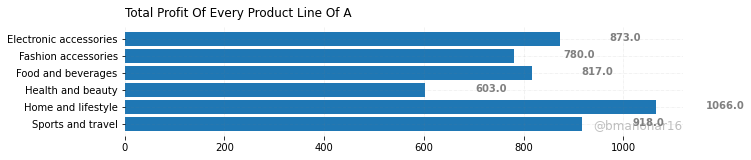

In [49]:
#visulazing total profit of every product line 

product_income = branch_A.groupby(['Product line'])['gross income'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(product_income.iloc[:,0], product_income.iloc[:,1])
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width()+100, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
ax.set_title('Total Profit Of Every Product Line Of A',
             loc='left', pad=10)
fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

plt.show()

In [14]:
#the most and the less used product

#using groupby func. to filter the data for each product line and their quantity that have been sold 
quntity = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Quantity']
             .sum().round(0)
             .unstack(fill_value=0))
quntity['total quantity '] = quntity.iloc[0:].sum(axis=1) #add a row for total quanity for every month
quntity.loc['total per month',0:]= quntity.sum(axis=0)    #add a column for quantity for every month
quntity

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Date,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,total quantity
Product line,,,,
Electronic accessories,112.0,94.0,116.0,322.0
Fashion accessories,106.0,87.0,70.0,263.0
Food and beverages,90.0,121.0,102.0,313.0
Health and beauty,70.0,52.0,135.0,257.0
Home and lifestyle,175.0,68.0,128.0,371.0
Sports and travel,119.0,75.0,139.0,333.0
total per month,672.0,497.0,690.0,1859.0


([<matplotlib.patches.Wedge at 0x7f82c6ba9a90>,
 [Text(0.9411188798401873, 0.5694692739809158, 'Electronic accessories'),
  Text(0.041815836097036846, 1.0992049107657342, 'Fashon accessories'),
  Text(-0.885307192110448, 0.6528638262283448, 'Food and beverages'),
  Text(-1.0414113109169192, -0.3542068343416094, 'Health and beauty'),
  Text(-0.21680464241909797, -1.1802524081845913, 'Home and lifestyle'),
  Text(0.9303708721151749, -0.5868645843119595, 'Sports and travel')],
 [Text(0.5133375708219202, 0.31061960398959043, '17.3%'),
  Text(0.022808637871111002, 0.5995663149631277, '14.1%'),
  Text(-0.4828948320602443, 0.35610754157909713, '16.8%'),
  Text(-0.5680425332274104, -0.193203727822696, '13.8%'),
  Text(-0.1264693747444738, -0.6884805714410116, '20.0%'),
  Text(0.5074750211537317, -0.32010795507925066, '17.9%')])

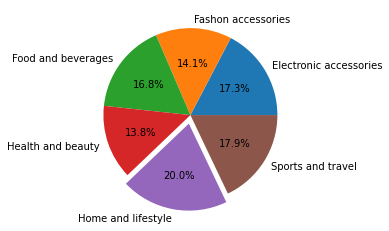

In [15]:
#visualizing most used product line
slices = branch_A.groupby(['Product line'])['Quantity'].sum()
labels = 'Electronic accessories','Fashon accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel'
explode = (0, 0, 0, 0, 0.1, 0)
plt.pie(slices, labels=labels, explode=explode,autopct='%1.1f%%')

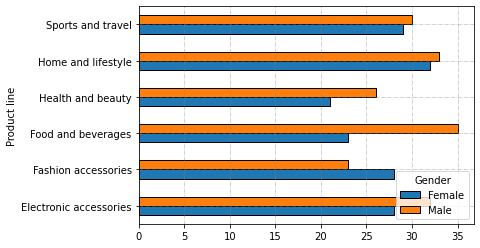

In [16]:
#most product line used by males and females

#using pivot table func. to filter the data for each product line and their quantity that have been sold and who most bought it 
per_gender_a = pd.pivot_table(branch_A, values='Quantity', index=['Product line'],
                    columns=['Gender'], aggfunc='count')

per_gender_a.plot.barh(edgecolor = 'black') #visulaizing the pivot table
plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.6, alpha=0.6)

([<matplotlib.patches.Wedge at 0x7f82c6a3b2d0>,
 [Text(-0.09137043414545647, 1.0961986333525833, 'Female'),
  Text(0.09137043414545609, -1.0961986333525833, 'Male')],
 [Text(-0.04983841862479443, 0.5979265272832271, '52.6%'),
  Text(0.04983841862479423, -0.5979265272832271, '47.4%')])

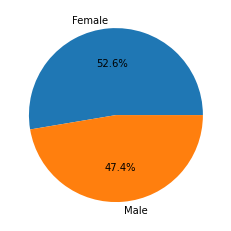

In [17]:
#visulazing perc. of who visit more 
slice = branch_A['Gender'].value_counts()
labels = 'Female','Male'
plt.pie(slice, labels=labels, autopct='%1.1f%%')

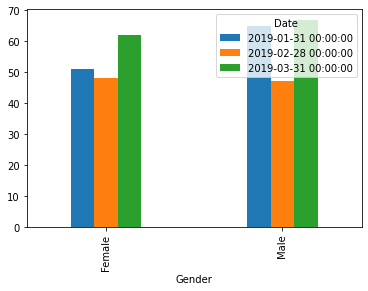

In [18]:
#visulazing the visitors in every month
visitors =  (branch_A.groupby(['Gender', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Gender'].count()
            .unstack(fill_value=0))
visitors.plot(kind='bar',width=0.4)

#Branch B

In [19]:
#filtering the columns that have any data about branch B  

branch_B = supermarket[supermarket['Branch']=='B']
branch_B.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2,172.7,2019-02-20,13:27,Credit card,164.52,4.8,8.0,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.9,60.8,2019-02-06,18:07,Ewallet,57.92,4.8,3.0,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1,107.1,2019-03-09,17:03,Cash,102.04,4.8,5.0,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1,590.4,2019-01-15,16:19,Cash,562.32,4.8,28.0,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.0,84.6,2019-03-11,15:30,Ewallet,80.60,4.8,4.0,4.4


In [20]:
#the gross income of every product line per month

#using groupby func. to filter the data for each product line and their gross income in every period
branch_B['Date'] = pd.to_datetime(branch_B['Date'], errors='coerce')
b = (branch_B.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0))
b['total income '] = b.iloc[0:].sum(axis=1)   #add a row for total income for every month
b.loc['total per month',0:]= b.sum(axis=0)   #add a column for total income for product line 
b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Date,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,total income
Product line,,,,
Electronic accessories,223.0,413.0,179.0,815.0
Fashion accessories,286.0,279.0,219.0,784.0
Food and beverages,315.0,266.0,145.0,726.0
Health and beauty,304.0,280.0,368.0,952.0
Home and lifestyle,218.0,222.0,397.0,837.0
Sports and travel,294.0,291.0,366.0,951.0
total per month,1640.0,1751.0,1674.0,5065.0


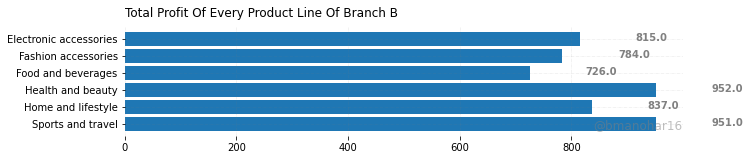

In [47]:

#visulazing total profit of every product line 
product_income_b = branch_B.groupby(['Product line'])['gross income'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(product_income_b.iloc[:,0], product_income_b.iloc[:,1])
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
for i in ax.patches:
    ax.text(i.get_width()+100, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
ax.set_title('Total Profit Of Every Product Line Of Branch B',
             loc='left', pad=10)
fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

plt.show()

In [24]:
#most and less used product

#using groupby func. to filter the data for each product line and their quantity that have been sold 
quntityb = (branch_B.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Quantity']
             .sum().round(0)
             .unstack(fill_value=0))
quntityb['total quantity '] = quntityb.iloc[0:].sum(axis=1)  #add a row for total quanity for every month
quntityb.loc['total per month',0:]= quntityb.sum(axis=0)   #add a row for total quanity for every month
quntityb

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Date,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,total quantity
Product line,,,,
Electronic accessories,90.0,146.0,80.0,316.0
Fashion accessories,101.0,110.0,86.0,297.0
Food and beverages,102.0,107.0,61.0,270.0
Health and beauty,91.0,102.0,127.0,320.0
Home and lifestyle,73.0,83.0,139.0,295.0
Sports and travel,105.0,103.0,114.0,322.0
total per month,562.0,651.0,607.0,1820.0


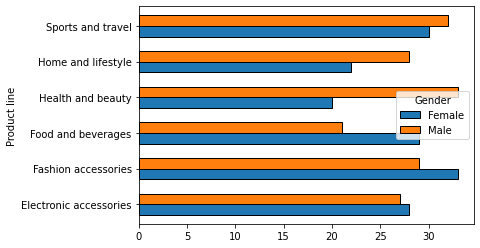

In [41]:
#most product line used by males and females

#using pivot table func. to filter the data for each product line and their quantity that have been sold and who most bought it 
per_gender_b = pd.pivot_table(branch_B, values='Quantity', index=['Product line'],
                    columns=['Gender'], aggfunc='count')
per_gender_b.plot.barh(width =0.6, edgecolor = 'black') #visulaizing the pivot table

([<matplotlib.patches.Wedge at 0x7f82c66cb450>,
 [Text(0.9403756865976617, 0.5706956877846342, 'Electronic accessories'),
  Text(-0.036070113168989205, 1.0994084531856105, 'Fashon accessories'),
  Text(-0.9324054816095344, 0.5836266082560769, 'Food and beverages'),
  Text(-1.0757122646196053, -0.531829976352368, 'Health and beauty'),
  Text(-0.05504102725688986, -1.0986220848492472, 'Home and lifestyle'),
  Text(1.0193616320445793, -0.6331681159971749, 'Sports and travel')],
 [Text(0.5129321926896335, 0.31128855697343677, '17.4%'),
  Text(-0.01967460718308502, 0.599677338101242, '16.3%'),
  Text(-0.5085848081506551, 0.3183417863214965, '14.8%'),
  Text(-0.6274988210281032, -0.3102341528722146, '17.6%'),
  Text(-0.0300223785037581, -0.5992484099177711, '16.2%'),
  Text(0.5946276186926711, -0.3693480676650187, '17.7%')])

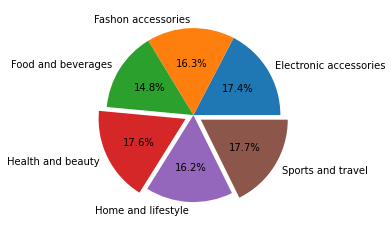

In [26]:
#most used product line
slices = branch_B.groupby(['Product line'])['Quantity'].sum()
labels = 'Electronic accessories','Fashon accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel'
explode = (0, 0, 0, 0.1, 0, 0.1)
plt.pie(slices, labels=labels, explode=explode,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f82c6630710>,
 [Text(-0.041625597110585624, 1.0992121313309764, 'Female'),
  Text(0.04162559711058597, -1.0992121313309762, 'Male')],
 [Text(-0.02270487115122852, 0.5995702534532598, '51.2%'),
  Text(0.02270487115122871, -0.5995702534532596, '48.8%')])

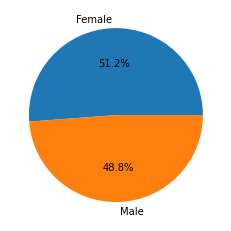

In [27]:
#visulazing perc. of who visit more 
slice = branch_B['Gender'].value_counts()
labels = 'Female','Male'
plt.pie(slice, labels=labels, autopct='%1.1f%%')

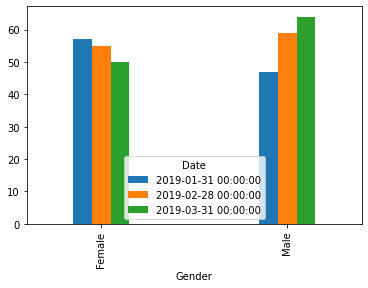

In [28]:
#visulazing the visitors in every month
visitorsb =  (branch_B.groupby(['Gender', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Gender'].count()
            .unstack(fill_value=0))
visitorsb.plot(kind='bar',width=0.3)

#Branch C

In [29]:
#filtering the columns that have any data about branch B  
branch_C = supermarket[supermarket['Branch']=='C']
branch_C.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8,80.2,2019-03-08,10:29,Cash,76.40,4.8,4.0,9.6
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.9,627.6,2019-03-25,18:30,Ewallet,597.73,4.8,30.0,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.8,772.4,2019-02-24,11:38,Ewallet,735.60,4.8,37.0,8.0
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5,451.7,2019-02-25,11:24,Ewallet,430.20,4.8,22.0,4.8
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.9,417.6,2019-02-06,10:42,Ewallet,397.68,4.8,20.0,7.5


In [30]:
#the gross income of every product line per month

#using groupby func. to filter the data for each product line and their gross income in every period
branch_C['Date'] = pd.to_datetime(branch_C['Date'], errors='coerce')
c = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0))
c['total income '] = c.iloc[0:].sum(axis=1)  #add a row for total income for every month
c.loc['total per month',0:]= c.sum(axis=0)   #add a column for total income for product line 
c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Date,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,total income
Product line,,,,
Electronic accessories,298.0,255.0,320.0,873.0
Fashion accessories,307.0,269.0,204.0,780.0
Food and beverages,221.0,312.0,284.0,817.0
Health and beauty,189.0,133.0,281.0,603.0
Home and lifestyle,493.0,227.0,346.0,1066.0
Sports and travel,308.0,225.0,385.0,918.0
total per month,1816.0,1421.0,1820.0,5057.0


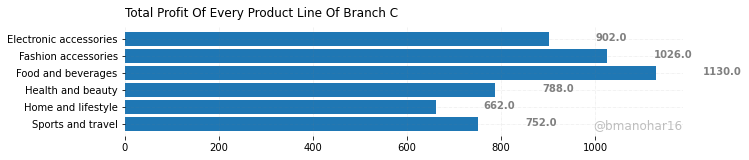

In [46]:
#visulaize total profit of every product line 
product_income_c = branch_C.groupby(['Product line'])['gross income'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,2))
ax.barh(product_income_c.iloc[:,0], product_income_c.iloc[:,1])
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
for i in ax.patches:
    ax.text(i.get_width()+100, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

ax.set_title('Total Profit Of Every Product Line Of Branch C',
             loc='left', pad=10)

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5) 

plt.show()

In [32]:
#most and less used product

#using groupby func. to filter the data for each product line and their quantity that have been sold 
branch_C['Date'] = pd.to_datetime(branch_C['Date'], errors='coerce')
quntity_c = (branch_B.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Quantity']
             .sum().round(0)
             .unstack(fill_value=0))
quntity_c['total quantity '] = quntity_c.iloc[0:].sum(axis=1)   #add a row for total income for every month
quntity_c.loc['total per month',0:] = quntity_c.sum(axis=0)      #add a column for total income for product line
quntity_c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Date,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,total quantity
Product line,,,,
Electronic accessories,90.0,146.0,80.0,316.0
Fashion accessories,101.0,110.0,86.0,297.0
Food and beverages,102.0,107.0,61.0,270.0
Health and beauty,91.0,102.0,127.0,320.0
Home and lifestyle,73.0,83.0,139.0,295.0
Sports and travel,105.0,103.0,114.0,322.0
total per month,562.0,651.0,607.0,1820.0


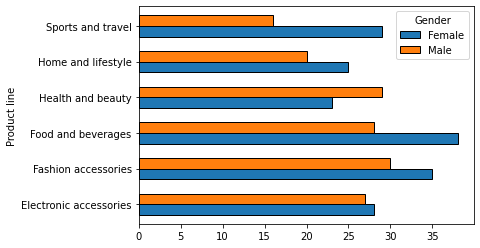

In [44]:
#most product line used by males and females

#using pivot table func. to filter the data for each product line and their quantity that have been sold and who most bought it 
per_gender_c = pd.pivot_table(branch_C, values='Quantity', index=['Product line'],
                    columns=['Gender'], aggfunc='count')
per_gender_c.plot.barh(width =0.6, edgecolor = 'black')

([<matplotlib.patches.Wedge at 0x7f82c67d2c10>,
 [Text(0.9252861013660728, 0.5948492503305134, 'Electronic accessories'),
  Text(-0.17384864263465857, 1.0861752388330748, 'Fashon accessories'),
  Text(-1.079751880860776, 0.21008540115299898, 'Food and beverages'),
  Text(-0.73058170803578, -0.9519718314548611, 'Health and beauty'),
  Text(0.2626129395845151, -1.0681921381300181, 'Home and lifestyle'),
  Text(1.0780811207005296, -0.5270114772840245, 'Sports and travel')],
 [Text(0.5047015098360397, 0.32446322745300726, '18.2%'),
  Text(-0.0948265323461774, 0.592459221181677, '18.7%'),
  Text(-0.5889555713786051, 0.11459203699254489, '20.2%'),
  Text(-0.4261726630208717, -0.5553169016820022, '15.1%'),
  Text(0.14324342159155365, -0.5826502571618281, '13.4%'),
  Text(0.6288806537419757, -0.30742336174901425, '14.5%')])

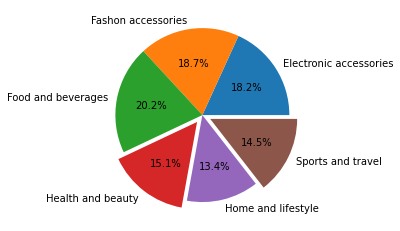

In [34]:
#most used product line
slices = branch_C.groupby(['Product line'])['Quantity'].sum()
labels = 'Electronic accessories','Fashon accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel'
explode = (0, 0, 0, 0.1, 0, 0.1)
plt.pie(slices, labels=labels, explode=explode,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f82c6aabe90>,
 [Text(-0.1470600363371991, 1.0901253807303553, 'Female'),
  Text(0.14706013840210297, -1.090125366961596, 'Male')],
 [Text(-0.08021456527483588, 0.5946138440347392, '54.3%'),
  Text(0.0802146209466016, -0.5946138365245068, '45.7%')])

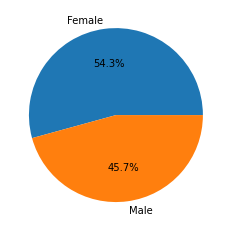

In [35]:
#perc. of who visit more 
slice = branch_C['Gender'].value_counts()
labels = 'Female','Male'
plt.pie(slice, labels=labels, autopct='%1.1f%%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


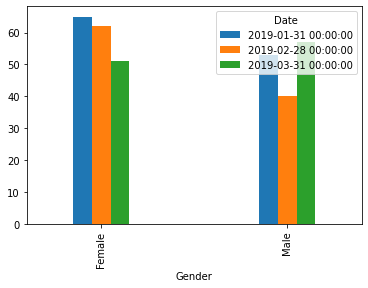

In [36]:
#visulazing the visitors in every month

branch_C['Date'] = pd.to_datetime(branch_C['Date'], errors='coerce')
visitorsc =  (branch_C.groupby(['Gender', pd.Grouper(freq='M', key='Date', closed='left')])
             ['Gender'].count()
            .unstack(fill_value=0))
visitorsc.plot(kind='bar',width=0.3)

#Comparing between the 3 branches

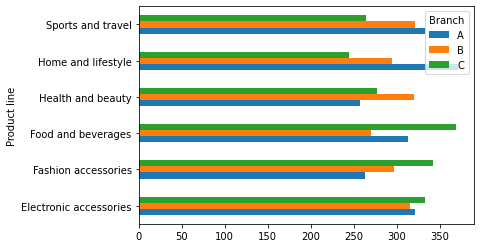

In [45]:
#comparing between the quantity of the products line of each branch
quantity = pd.pivot_table(supermarket, values='Quantity', index=['Product line'],
                           columns=['Branch'], aggfunc='sum')
quantity.plot(kind='barh')

([<matplotlib.patches.Wedge at 0x7f82c683a4d0>,
 [Text(0.5636270452177209, 0.9446293208974308, 'A'),
  Text(-1.099054706517522, 0.045593333741720046, 'B'),
  Text(0.5716246183906207, -1.055104400355613, 'C')],
 [Text(0.3074329337551205, 0.5152523568531441, '32.9%'),
  Text(-0.5994843853731937, 0.024869091131847296, '32.9%'),
  Text(0.33344769406119545, -0.6154775668741075, '34.2%')])

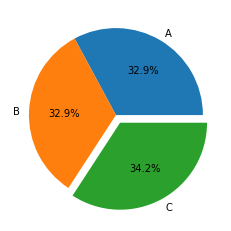

In [38]:
#wanna show the value of the each one??

brancha = branch_A['gross income'].sum()
branchb = branch_B['gross income'].sum()
branchc = branch_C['gross income'].sum()

slices1 = brancha, branchb, branchc
labels1 = 'A', 'B','C'
explode = (0,0,0.1 )
plt.pie(slices1, labels=labels1, autopct='%1.1f%%', explode=explode)

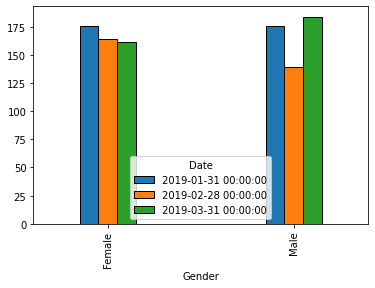

In [39]:
#customers vists per month
supermarket['Date'] = pd.to_datetime(supermarket['Date'], errors='coerce')
gender = (supermarket.groupby(['Gender', pd.Grouper(freq='M', key='Date', closed='right')])
             ['Gender'].count()
            .unstack(fill_value=0))
gender.plot(kind='bar',width=0.3, edgecolor = 'black')

In [40]:
#supermarket.to_csv('supermarket.csv',encoding = 'utf-8-sig')
#files.download('supermarket.csv')